<h1>DATA PREPARATION</h1>

<h><strong>Explore the big dataset</strong></h>

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [248]:
songs = pd.read_csv("big_df_audio_features.csv")
songs.set_index("name", inplace=True)
songs = songs[['danceability','energy','valence']]
songs

,danceability,energy,valence
name,,,
Se Eu Quiser Falar Com Deus,0.6580,0.25900,0.3060
Saudade De Bahia,0.7420,0.39900,0.6930
"Canta Canta, Minha Gente",0.8510,0.73000,0.9050
Mulher Eu Sei,0.7050,0.05020,0.5240
Rosa Morena,0.6510,0.11900,0.4020
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,0.0655
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,0.0355
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,0.0344


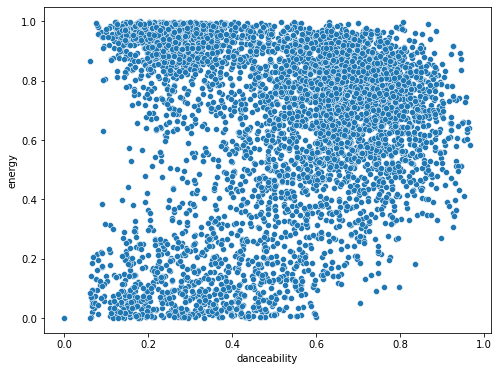

In [249]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=songs, x='danceability', y='energy')
plt.show()

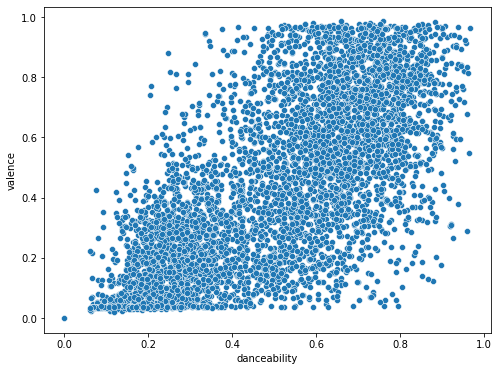

In [250]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=songs, x='danceability', y='valence')
plt.show()

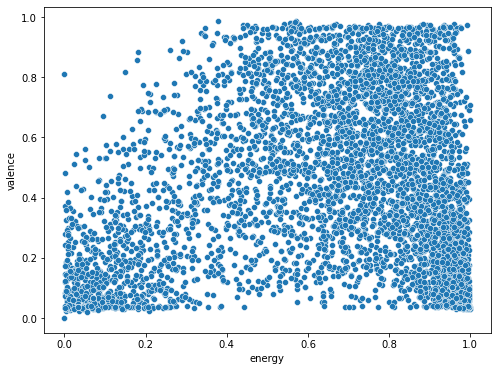

In [251]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=songs, x='energy', y='valence')
plt.show()

<h1>DATA MODELING</h1>

<h><strong>Scaling</strong></h>

In [252]:
from sklearn.preprocessing import MinMaxScaler

In [253]:
my_min_max = MinMaxScaler(feature_range=(0,1))
my_min_max.fit(songs)
scaled_audio_features = my_min_max.transform(songs)
pd.DataFrame(scaled_audio_features, index=songs.index, columns=songs.columns)

,danceability,energy,valence
name,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660
Saudade De Bahia,0.767322,0.39900,0.703553
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782
Mulher Eu Sei,0.729059,0.05020,0.531980
Rosa Morena,0.673216,0.11900,0.408122
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924


<h><strong>Cluster</strong></h>

In [254]:
from sklearn.cluster import KMeans

In [255]:
kmeans = KMeans(n_clusters=25)
kmeans.fit(scaled_audio_features)
kmeans.cluster_centers_

array([[0.84145255, 0.76456154, 0.86791488],
       [0.32508861, 0.66489655, 0.23344653],
       [0.40796047, 0.08354398, 0.15029983],
       [0.81451737, 0.74218298, 0.58614537],
       [0.80688487, 0.53267485, 0.49194357],
       [0.26294286, 0.9297204 , 0.25150814],
       [0.62196083, 0.86471366, 0.57805854],
       [0.17870808, 0.07370169, 0.06431633],
       [0.64497262, 0.85215164, 0.37156528],
       [0.67257559, 0.27412851, 0.61758467],
       [0.53255233, 0.47883942, 0.77778354],
       [0.23180177, 0.9539213 , 0.09093462],
       [0.75463536, 0.86910798, 0.74108339],
       [0.60817729, 0.38479339, 0.27287075],
       [0.66922451, 0.6717343 , 0.73401015],
       [0.56997139, 0.91334416, 0.16283671],
       [0.40886891, 0.37092079, 0.44616776],
       [0.65299024, 0.63631169, 0.20984837],
       [0.25683681, 0.26573881, 0.14688613],
       [0.5095735 , 0.12414433, 0.35491463],
       [0.40532532, 0.86654622, 0.71563366],
       [0.79054364, 0.52614346, 0.88044721],
       [0.

In [256]:
kmeans.labels_

array([13,  9,  0, ...,  7,  7,  2], dtype=int32)

In [257]:
scaled_audio_features= pd.DataFrame(scaled_audio_features,index=songs.index)
scaled_audio_features.columns = ['danceability','energy','valence']
scaled_audio_features

,danceability,energy,valence
name,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660
Saudade De Bahia,0.767322,0.39900,0.703553
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782
Mulher Eu Sei,0.729059,0.05020,0.531980
Rosa Morena,0.673216,0.11900,0.408122
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924


In [258]:
from sklearn.cluster import KMeans

In [259]:
kmeans = KMeans(n_clusters=25)
kmeans.fit(scaled_audio_features)
kmeans.cluster_centers_

array([[0.37391881, 0.94152308, 0.17475674],
       [0.82667353, 0.8089205 , 0.75417879],
       [0.40971353, 0.08468007, 0.15217873],
       [0.58348434, 0.63869266, 0.50279421],
       [0.79814805, 0.54537023, 0.88179564],
       [0.58564616, 0.85612146, 0.39039438],
       [0.33322343, 0.87543478, 0.46111479],
       [0.2179171 , 0.95484655, 0.0909842 ],
       [0.55197861, 0.51192899, 0.77956928],
       [0.66962254, 0.86850714, 0.61104423],
       [0.64531196, 0.26593517, 0.65248731],
       [0.79893192, 0.82780597, 0.91714524],
       [0.62611758, 0.52401899, 0.20699865],
       [0.17873001, 0.07659663, 0.06659938],
       [0.45077559, 0.38208462, 0.4243811 ],
       [0.26776459, 0.27458955, 0.14973331],
       [0.78893545, 0.72850292, 0.41191558],
       [0.41676224, 0.86782727, 0.73791417],
       [0.78391971, 0.44520144, 0.48297119],
       [0.63987084, 0.86837415, 0.16645188],
       [0.32819693, 0.66162143, 0.23529079],
       [0.52110623, 0.13920202, 0.35454738],
       [0.

In [260]:
centroids_list=kmeans.cluster_centers_.tolist()

In [261]:
centroids = kmeans.cluster_centers_
centroids=pd.DataFrame(centroids)
columns=['danceability','energy','valence']
centroids.columns = columns
centroids

,danceability,energy,valence
0,0.373919,0.941523,0.174757
1,0.826674,0.808921,0.754179
2,0.409714,0.084680,0.152179
3,0.583484,0.638693,0.502794
4,0.798148,0.545370,0.881796
5,0.585646,0.856121,0.390394
6,0.333223,0.875435,0.461115
7,0.217917,0.954847,0.090984
8,0.551979,0.511929,0.779569
9,0.669623,0.868507,0.611044


In [262]:
scaled_audio_features['cluster'] = kmeans.labels_
scaled_audio_features

,danceability,energy,valence,cluster
name,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660,21
Saudade De Bahia,0.767322,0.39900,0.703553,10
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782,11
Mulher Eu Sei,0.729059,0.05020,0.531980,10
Rosa Morena,0.673216,0.11900,0.408122,21
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041,13
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924,13


<h><strong>Explore Clusters</strong></h>

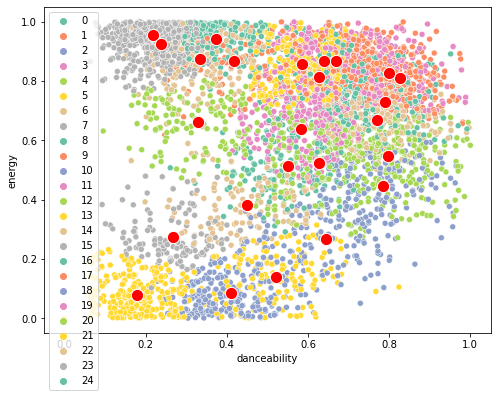

In [263]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=scaled_audio_features, x='danceability', y='energy',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids,  x='danceability', y='energy', color='red', s=150)
plt.show()

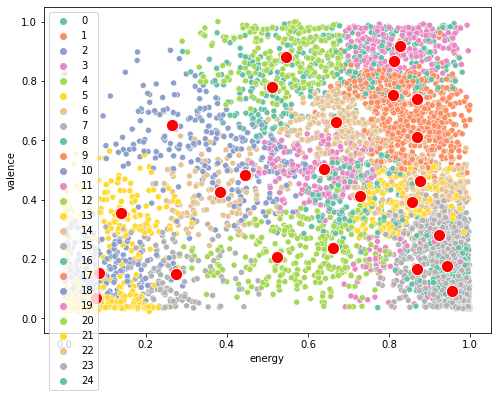

In [264]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=scaled_audio_features, x='energy', y='valence',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids,  x='energy', y='valence', color='red', s=150)
plt.show()

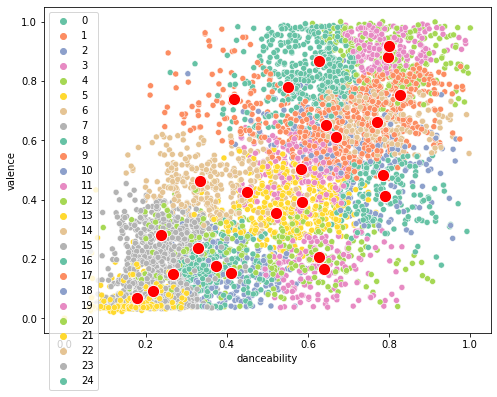

In [265]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=scaled_audio_features, x='danceability', y='valence', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids,  x='danceability', y='valence', color='red', s=150)
plt.show()

In [266]:
centroids

,danceability,energy,valence
0,0.373919,0.941523,0.174757
1,0.826674,0.808921,0.754179
2,0.409714,0.084680,0.152179
3,0.583484,0.638693,0.502794
4,0.798148,0.545370,0.881796
5,0.585646,0.856121,0.390394
6,0.333223,0.875435,0.461115
7,0.217917,0.954847,0.090984
8,0.551979,0.511929,0.779569
9,0.669623,0.868507,0.611044


In [267]:
centroids_list

[[0.373918807838146, 0.9415230769230769, 0.17475673565013666],
 [0.8266735319951712, 0.8089205020920501, 0.7541787906463053],
 [0.4097135289101761, 0.08468007017543877, 0.15217873363612072],
 [0.5834843410529112, 0.6386926605504587, 0.5027942066781539],
 [0.7981480458173149, 0.5453702290076337, 0.8817956368427171],
 [0.585646161382296, 0.8561214574898786, 0.3903943771964076],
 [0.3332234262048569, 0.8754347826086957, 0.46111478947497486],
 [0.21791709534854803, 0.954846547314578, 0.09098420034533339],
 [0.5519786076623242, 0.5119289940828402, 0.7795692788273811],
 [0.669622543950362, 0.8685071428571429, 0.6110442349528644],
 [0.6453119613926233, 0.2659351691666667, 0.65248730964467],
 [0.7989319174551236, 0.8278059701492537, 0.9171452382756269],
 [0.6261175762177164, 0.5240189873417722, 0.2069986506457623],
 [0.17873001352318835, 0.07659663461538468, 0.06659937524404524],
 [0.45077559462254396, 0.38208461538461536, 0.42438110113237015],
 [0.2677645896679992, 0.27458955223880593, 0.1497

/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

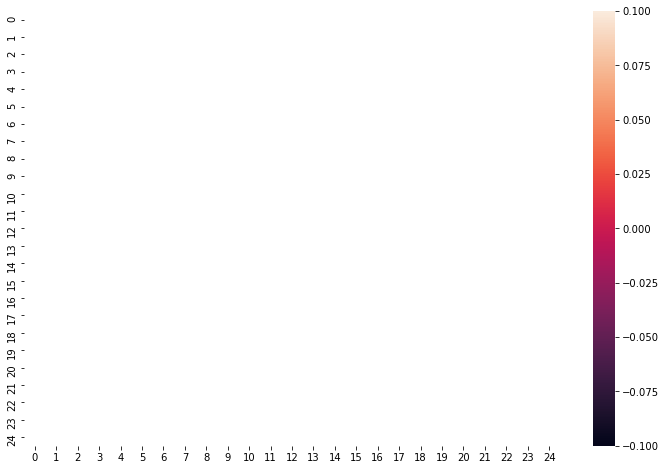

In [268]:
centroids_pivot = pd.DataFrame(centroids, columns =  centroids.index, index =  centroids.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(centroids_pivot)

<h><strong>Calculating distances</strong></h>

In [269]:
def euclidean_distance(centroid, song): 
    distance = (
        pd.DataFrame({
            'centroid':centroid,
            'song':song
        })
        .assign(dist_abs = lambda x: (x.centroid - x.song)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance

In [270]:
scaled_audio_features

,danceability,energy,valence,cluster
name,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660,21
Saudade De Bahia,0.767322,0.39900,0.703553,10
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782,11
Mulher Eu Sei,0.729059,0.05020,0.531980,10
Rosa Morena,0.673216,0.11900,0.408122,21
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041,13
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924,13


In [271]:
centroids_list

[[0.373918807838146, 0.9415230769230769, 0.17475673565013666],
 [0.8266735319951712, 0.8089205020920501, 0.7541787906463053],
 [0.4097135289101761, 0.08468007017543877, 0.15217873363612072],
 [0.5834843410529112, 0.6386926605504587, 0.5027942066781539],
 [0.7981480458173149, 0.5453702290076337, 0.8817956368427171],
 [0.585646161382296, 0.8561214574898786, 0.3903943771964076],
 [0.3332234262048569, 0.8754347826086957, 0.46111478947497486],
 [0.21791709534854803, 0.954846547314578, 0.09098420034533339],
 [0.5519786076623242, 0.5119289940828402, 0.7795692788273811],
 [0.669622543950362, 0.8685071428571429, 0.6110442349528644],
 [0.6453119613926233, 0.2659351691666667, 0.65248730964467],
 [0.7989319174551236, 0.8278059701492537, 0.9171452382756269],
 [0.6261175762177164, 0.5240189873417722, 0.2069986506457623],
 [0.17873001352318835, 0.07659663461538468, 0.06659937524404524],
 [0.45077559462254396, 0.38208461538461536, 0.42438110113237015],
 [0.2677645896679992, 0.27458955223880593, 0.1497

In [272]:
scaled_audio_features
distances=[]

for index, row in scaled_audio_features.iterrows(): 
    val= list(row)[:-1]
    distances.append(euclidean_distance(centroids_list, val))

#scaled_audio_features=scaled_audio_features.assign(centroid_dist = distances)

ValueError: arrays must all be same length

In [ ]:
pd.pivot_table(scaled_audio_features, values="")

In [ ]:
pd.pivot_table(student_Euclidean_distance, 
                                                        values='Euclidean_distance', 
                                                        index='student_1',
                                                        columns='student_2')

<h1>CHOSE RIGHT CLUSTERS</h1>

In [273]:
kmeans.inertia_

80.24384672396698

In [274]:
songs2 = pd.read_csv("big_df_audio_features.csv")
songs2.set_index("name", inplace=True)
songs2=songs2.drop(['artist'], axis=1)
songs2=songs2.drop(['key','time_signature'], axis=1)
songs2=songs2.drop(['mode','duration_ms'], axis=1)
songs2=songs2.drop(['tempo'], axis=1)
songs2=songs2.drop(['loudness'], axis=1)
songs2=songs2.drop(['liveness'], axis=1)
songs2=songs2.drop(['acousticness'], axis=1)
songs2=songs2.drop(['speechiness'], axis=1)
songs2=songs2.drop(['instrumentalness'], axis=1)

In [562]:
my_min_max = MinMaxScaler(feature_range=(0,1))
my_min_max.fit(songs2)
scaled_audio_features2 = my_min_max.transform(songs2)
scaled_audio_features2=pd.DataFrame(scaled_audio_features2, index=songs2.index, columns=songs2.columns)
scaled_audio_features2

,danceability,energy,valence
name,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660
Saudade De Bahia,0.767322,0.39900,0.703553
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782
Mulher Eu Sei,0.729059,0.05020,0.531980
Rosa Morena,0.673216,0.11900,0.408122
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924


In [276]:
kmeans.inertia_

80.24384672396698

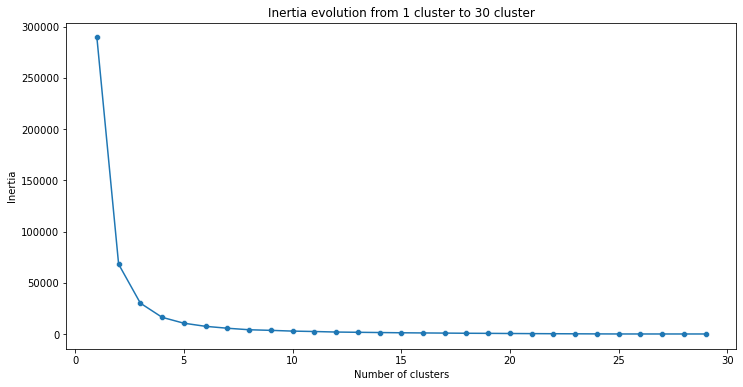

In [560]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_audio_features2).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [278]:
silhouette_score(scaled_audio_features2, kmeans.labels_)

0.2635792692138638

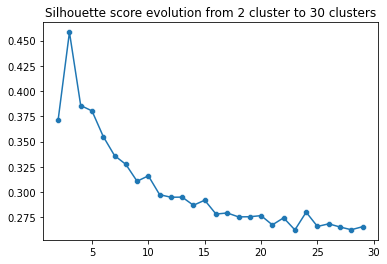

In [563]:
max_k = 30
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_audio_features2).labels_
    sil_score.append(silhouette_score(scaled_audio_features2, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

In [280]:
kmeans2 = KMeans(n_clusters=15)
kmeans2.fit(scaled_audio_features2)
kmeans2.cluster_centers_

array([[0.43076735, 0.12815095, 0.22182917],
       [0.6813936 , 0.87040761, 0.53121552],
       [0.24869504, 0.94328634, 0.13084908],
       [0.50097391, 0.84354217, 0.75837971],
       [0.56682162, 0.46594175, 0.75690207],
       [0.292886  , 0.89437277, 0.37642087],
       [0.75926652, 0.82524904, 0.85781356],
       [0.57808004, 0.66145238, 0.4806485 ],
       [0.38467063, 0.544745  , 0.23605939],
       [0.20270197, 0.10687233, 0.07669013],
       [0.60543778, 0.28243383, 0.50376904],
       [0.78894098, 0.55180139, 0.88397036],
       [0.79563375, 0.6728665 , 0.6466289 ],
       [0.60660932, 0.86457095, 0.23089073],
       [0.74306314, 0.55528972, 0.29394658]])

In [281]:
kmeans2.labels_

array([10,  4,  6, ...,  9,  9,  0], dtype=int32)

In [282]:
centroids2 = kmeans2.cluster_centers_
centroids2=pd.DataFrame(centroids2)
columns=['danceability','energy','valence']
centroids2.columns = columns
centroids2

,danceability,energy,valence
0,0.430767,0.128151,0.221829
1,0.681394,0.870408,0.531216
2,0.248695,0.943286,0.130849
3,0.500974,0.843542,0.758380
4,0.566822,0.465942,0.756902
5,0.292886,0.894373,0.376421
6,0.759267,0.825249,0.857814
7,0.578080,0.661452,0.480649
8,0.384671,0.544745,0.236059
9,0.202702,0.106872,0.076690


In [283]:
scaled_audio_features2['cluster'] = kmeans.labels_
scaled_audio_features2

,danceability,energy,valence,cluster
name,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660,21
Saudade De Bahia,0.767322,0.39900,0.703553,10
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782,11
Mulher Eu Sei,0.729059,0.05020,0.531980,10
Rosa Morena,0.673216,0.11900,0.408122,21
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041,13
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924,13


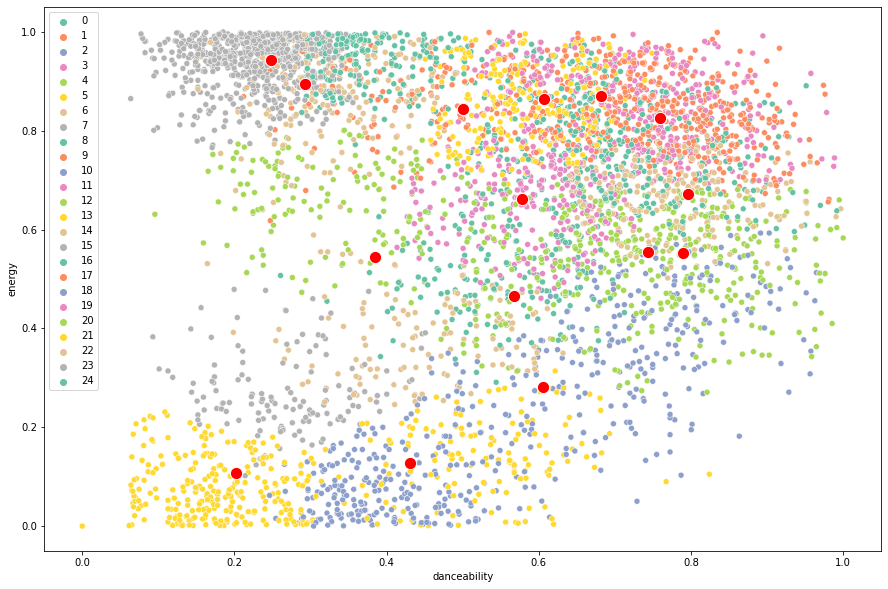

In [516]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=scaled_audio_features2, x='danceability', y='energy',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids2,  x='danceability', y='energy', color='red', s=150)
plt.show()

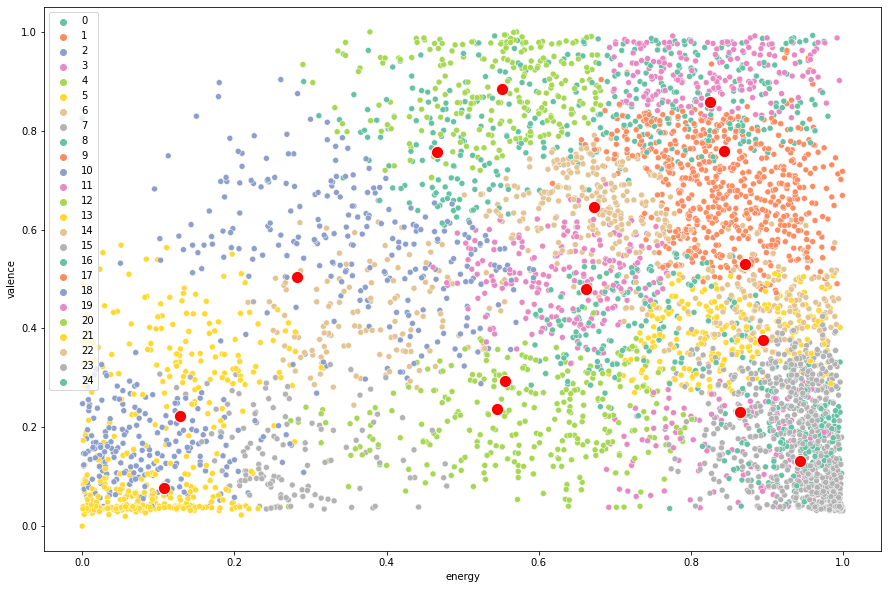

In [559]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=scaled_audio_features2, x='energy', y='valence',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids2,  x='energy', y='valence', color='red', s=150)
plt.show()

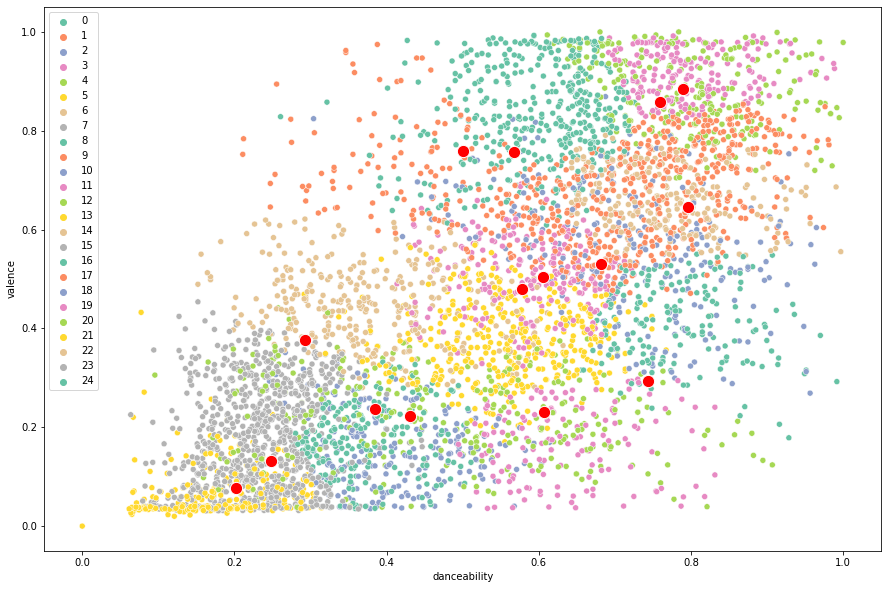

In [558]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=scaled_audio_features2, x='danceability', y='valence', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids2,  x='danceability', y='valence', color='red', s=150)
plt.show()

<h><strong>Calculating distances</strong></h>

In [288]:
scaled_audio_features2

,danceability,energy,valence,cluster
name,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.310660,21
Saudade De Bahia,0.767322,0.39900,0.703553,10
"Canta Canta, Minha Gente",0.880041,0.73000,0.918782,11
Mulher Eu Sei,0.729059,0.05020,0.531980,10
Rosa Morena,0.673216,0.11900,0.408122,21
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.066497,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.036041,13
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.034924,13


In [289]:
centroids2

,danceability,energy,valence
0,0.430767,0.128151,0.221829
1,0.681394,0.870408,0.531216
2,0.248695,0.943286,0.130849
3,0.500974,0.843542,0.758380
4,0.566822,0.465942,0.756902
5,0.292886,0.894373,0.376421
6,0.759267,0.825249,0.857814
7,0.578080,0.661452,0.480649
8,0.384671,0.544745,0.236059
9,0.202702,0.106872,0.076690


In [314]:
centroid_0=centroids2.iloc[0,0:3].tolist()
centroid_0

[0.43076734552366835, 0.12815094508670533, 0.22182917167923485]

In [320]:
def euclidean_distance(centroid, song): 
    distance = (
        pd.DataFrame({
            'centroid':centroid,
            'song':song
        })
        .assign(dist_abs = lambda x: (x.centroid - x.song)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance
euclidean_distance(centroid=centroid_0, song=val_test)

0.8592772060596847

In [326]:
cluster_0_playlist=scaled_audio_features2.query('cluster == 0').iloc[:,0:3]
cluster_0_playlist

,danceability,energy,valence
name,,,
There She Goes,0.389866,0.986,0.249746
Alright,0.399173,0.995,0.066904
Gone,0.409514,0.895,0.184772
The Nun's Litany,0.483971,0.964,0.275127
"Love Is a Hurtin' Thing - 12"" Version",0.321613,0.867,0.093299
...,...,...,...
Languish in Despair,0.370217,0.873,0.166497
Epoch of Barbarity,0.417787,0.875,0.226396
Two of Me - remastered 2003,0.307135,0.874,0.165482


In [328]:
cluster_0_playlist
dist = []
for index, row in cluster_0_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_0, val))

cluster_0_playlist= cluster_0_playlist.assign(centroid_dist = dist)

cluster_0_playlist.sort_values(by='centroid_dist').head(30)

,danceability,energy,valence,centroid_dist
name,,,,
Shot Me Down (feat. Skylar Grey) - Radio Edit,0.358842,0.772,0.035533,0.674108
Incinerated,0.458118,0.815,0.161421,0.690043
The Alphabeat,0.397104,0.823,0.158376,0.698552
Tonight - Cutline Remix,0.464323,0.839,0.144162,0.715866
In Exile,0.384695,0.845,0.227411,0.718350
Allein Allein,0.480869,0.844,0.131980,0.723203
Calling (Lose My Mind) - Radio Edit,0.430196,0.849,0.149239,0.724495
Slow Extincion of Life,0.288521,0.837,0.144162,0.727140
The Ethno-Surge,0.312306,0.847,0.204061,0.728761


In [332]:
cluster_0_playlist['centroid_dist'].mean()

0.8219169451099566

In [573]:
cluster_0_playlist.sort_values(by='centroid_dist').head(30)

,danceability,energy,valence,centroid_dist
name,,,,
Shot Me Down (feat. Skylar Grey) - Radio Edit,0.358842,0.772,0.035533,0.674108
Incinerated,0.458118,0.815,0.161421,0.690043
The Alphabeat,0.397104,0.823,0.158376,0.698552
Tonight - Cutline Remix,0.464323,0.839,0.144162,0.715866
In Exile,0.384695,0.845,0.227411,0.718350
Allein Allein,0.480869,0.844,0.131980,0.723203
Calling (Lose My Mind) - Radio Edit,0.430196,0.849,0.149239,0.724495
Slow Extincion of Life,0.288521,0.837,0.144162,0.727140
The Ethno-Surge,0.312306,0.847,0.204061,0.728761


In [574]:
playlist_0=cluster_0_playlist.sort_values(by='centroid_dist').head(30)

In [336]:
playlist_0=cluster_0_playlist.query('centroid_dist <=0.8219169451099566')
playlist_0

,danceability,energy,valence,centroid_dist
name,,,,
Gone,0.409514,0.895,0.184772,0.768038
"Love Is a Hurtin' Thing - 12"" Version",0.321613,0.867,0.093299,0.757847
Love Me Again,0.501551,0.915,0.204061,0.790226
Don't Look Back in Anger,0.360910,0.913,0.228426,0.787979
Mr. Brightside,0.362978,0.928,0.242640,0.802986
...,...,...,...,...
Languish in Despair,0.370217,0.873,0.166497,0.749352
Epoch of Barbarity,0.417787,0.875,0.226396,0.746976
Two of Me - remastered 2003,0.307135,0.874,0.165482,0.758123


In [575]:
p_0=playlist_0.reset_index()
p_0['cluster']="metal"
p_0.set_index("name", inplace=True)
p_0

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Shot Me Down (feat. Skylar Grey) - Radio Edit,0.358842,0.772,0.035533,0.674108,metal
Incinerated,0.458118,0.815,0.161421,0.690043,metal
The Alphabeat,0.397104,0.823,0.158376,0.698552,metal
Tonight - Cutline Remix,0.464323,0.839,0.144162,0.715866,metal
In Exile,0.384695,0.845,0.227411,0.718350,metal
Allein Allein,0.480869,0.844,0.131980,0.723203,metal
Calling (Lose My Mind) - Radio Edit,0.430196,0.849,0.149239,0.724495,metal
Slow Extincion of Life,0.288521,0.837,0.144162,0.727140,metal
The Ethno-Surge,0.312306,0.847,0.204061,0.728761,metal


cluster 1

In [329]:
cluster_1_playlist=scaled_audio_features2.query('cluster == 1').iloc[:,0:3]
cluster_1_playlist

,danceability,energy,valence
name,,,
Aqua De Coco,0.780765,0.732,0.828426
'A bertoela,0.713547,0.889,0.772589
Al Final Abrazos,0.761117,0.703,0.824365
Just Dance,0.850052,0.737,0.764467
Dynamite,0.776629,0.783,0.828426
...,...,...,...
No Es Justo,0.707342,0.811,0.731980
Hasta Que Se Seque el Malecón,0.851086,0.828,0.668020
Escápate Conmigo (feat. Ozuna),0.769390,0.859,0.798985


In [330]:
centroid_1=centroids2.iloc[1,0:3].tolist()
centroid_1

[0.6813935974101883, 0.8704076086956521, 0.5312155153387773]

In [331]:
cluster_1_playlist
dist = []
for index, row in cluster_1_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_1, val))

cluster_1_playlist= cluster_1_playlist.assign(centroid_dist = dist)

cluster_1_playlist.sort_values(by='centroid_dist').head(30)

,danceability,energy,valence,centroid_dist
name,,,,
Cooler Than Me - Single Mix,0.794209,0.820,0.634518,0.161058
China,0.812823,0.808,0.618274,0.169551
Mad Love,0.820062,0.824,0.620305,0.171229
Chulin Culin Chunfly (feat. Residente Calle 13),0.820062,0.823,0.625381,0.174194
Tambourine,0.847983,0.854,0.582741,0.175146
You Know You Like It - Tchami Remix,0.842813,0.840,0.595939,0.176550
Mi Cama Huele a Ti (feat. Zion & Lennox),0.763185,0.850,0.688325,0.178297
Intoxicated,0.833506,0.871,0.629442,0.181071
Freakin' Out - Original Edit,0.794209,0.801,0.670051,0.191885


In [337]:
cluster_1_playlist['centroid_dist'].mean()

0.2883983874323099

In [578]:
playlist_1=cluster_1_playlist.sort_values(by='centroid_dist').head(30)
p_1=playlist_1.reset_index()
p_1['cluster']="dance party"
p_1.set_index("name", inplace=True)
p_1

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Cooler Than Me - Single Mix,0.794209,0.820,0.634518,0.161058,dance party
China,0.812823,0.808,0.618274,0.169551,dance party
Mad Love,0.820062,0.824,0.620305,0.171229,dance party
Chulin Culin Chunfly (feat. Residente Calle 13),0.820062,0.823,0.625381,0.174194,dance party
Tambourine,0.847983,0.854,0.582741,0.175146,dance party
You Know You Like It - Tchami Remix,0.842813,0.840,0.595939,0.176550,dance party
Mi Cama Huele a Ti (feat. Zion & Lennox),0.763185,0.850,0.688325,0.178297,dance party
Intoxicated,0.833506,0.871,0.629442,0.181071,dance party
Freakin' Out - Original Edit,0.794209,0.801,0.670051,0.191885,dance party


In [533]:
playlist_1=cluster_1_playlist.query('centroid_dist <=0.2883983874323099')
p_1=playlist_1.reset_index()
p_1['cluster']=1
p_1.set_index("name", inplace=True)
p_1

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
'A bertoela,0.713547,0.889,0.772589,0.244214,1
Bang Bang,0.735264,0.774,0.725888,0.223817,1
Stitches,0.771458,0.754,0.775635,0.285312,1
Yeah! (feat. Lil Jon & Ludacris),0.924509,0.791,0.591878,0.262851,1
Hips Don't Lie (feat. Wyclef Jean),0.804550,0.824,0.769543,0.272252,1
...,...,...,...,...,...
No Es Justo,0.707342,0.811,0.731980,0.210971,1
Hasta Que Se Seque el Malecón,0.851086,0.828,0.668020,0.222057,1
Escápate Conmigo (feat. Ozuna),0.769390,0.859,0.798985,0.282088,1


cluster 2

In [423]:
cluster_2_playlist=scaled_audio_features2.query('cluster == 2').iloc[:,0:3]
cluster_2_playlist

,danceability,energy,valence
name,,,
Não Sei,0.395036,0.0866,0.159391
Coracao Vagabundo,0.603930,0.0506,0.127919
Apelo,0.549121,0.1530,0.166497
Inês,0.477766,0.0827,0.227411
Violão Vadio,0.376422,0.0884,0.154315
...,...,...,...
"Symphony No. 3 in G Minor, Op. 36: I. Adagio - Allegro",0.354705,0.1330,0.193909
"Symphony No. 41 in C Major, K. 551 - “Jupiter”: Symphony No. 41 in C Major, K. 551 - “Jupiter”: IV. Molto Allegro",0.449845,0.2580,0.203046
Stravinsky: Symphony in C: I. Moderato alla breve,0.371251,0.0321,0.304569


In [424]:
centroid_2=centroids2.iloc[2,0:3].tolist()
centroid_2

[0.24869504211672416, 0.9432863436123347, 0.13084907980947685]

In [425]:
cluster_2_playlist
dist = []
for index, row in cluster_2_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_2, val))

cluster_2_playlist= cluster_2_playlist.assign(centroid_dist = dist)



In [426]:
cluster_2_playlist['centroid_dist'].mean()

0.8804302895874581

In [427]:
playlist_2=cluster_2_playlist.query('centroid_dist <=0.8804302895874581')
playlist_2

,danceability,energy,valence,centroid_dist
name,,,,
Não Sei,0.395036,0.0866,0.159391,0.869564
Apelo,0.549121,0.1530,0.166497,0.846215
Violão Vadio,0.376422,0.0884,0.154315,0.864694
De Mi Esperanza,0.492244,0.1240,0.207107,0.858115
Deus Ibi Est,0.537746,0.1400,0.152284,0.853978
...,...,...,...,...
"Symphony No.38 In D, K.504 ""Prague"": 1. Adagio - Allegro - Live",0.390900,0.0990,0.147208,0.856335
"Symphony No.102 In B Flat Major, Hob.I:102: 1. Largo - Vivace",0.490176,0.2050,0.193909,0.779331
"Symphony No. 3 in G Minor, Op. 36: I. Adagio - Allegro",0.354705,0.1330,0.193909,0.819621


In [580]:
playlist_2=cluster_2_playlist.sort_values(by='centroid_dist').head(30)
p_2=playlist_2.reset_index()
p_2['cluster']="slowly sadness"
p_2.set_index("name", inplace=True)
p_2

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Someone You Loved - Piano Version,0.496381,0.291,0.108629,0.698083,slowly sadness
Stolen Moments,0.492244,0.273,0.166497,0.714052,slowly sadness
"Symphony No. 41 in C Major, K. 551 - “Jupiter”: Symphony No. 41 in C Major, K. 551 - “Jupiter”: IV. Molto Allegro",0.449845,0.258,0.203046,0.717838,slowly sadness
Soledad de Murcia,0.480869,0.263,0.128934,0.718817,slowly sadness
Endless Love,0.499483,0.268,0.184772,0.722367,slowly sadness
Weaver Of Dreams - Remastered 2003/Rudy Van Gelder Edition,0.432265,0.227,0.213198,0.744006,slowly sadness
It Ain't Necessarily So,0.494312,0.238,0.180711,0.748494,slowly sadness
Dew and Spiderwebs,0.426060,0.218,0.067107,0.749374,slowly sadness
"Bang Bang (My Baby Shot Me Down) - From ""Kill Bill""",0.492244,0.235,0.174619,0.750268,slowly sadness


In [536]:
p_2=playlist_2.reset_index()
p_2['cluster']=2
p_2.set_index("name", inplace=True)
p_2

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Não Sei,0.395036,0.0866,0.159391,0.869564,2
Apelo,0.549121,0.1530,0.166497,0.846215,2
Violão Vadio,0.376422,0.0884,0.154315,0.864694,2
De Mi Esperanza,0.492244,0.1240,0.207107,0.858115,2
Deus Ibi Est,0.537746,0.1400,0.152284,0.853978,2
...,...,...,...,...,...
"Symphony No.38 In D, K.504 ""Prague"": 1. Adagio - Allegro - Live",0.390900,0.0990,0.147208,0.856335,2
"Symphony No.102 In B Flat Major, Hob.I:102: 1. Largo - Vivace",0.490176,0.2050,0.193909,0.779331,2
"Symphony No. 3 in G Minor, Op. 36: I. Adagio - Allegro",0.354705,0.1330,0.193909,0.819621,2


cluster 3

In [363]:
cluster_3_playlist=scaled_audio_features2.query('cluster == 3').iloc[:,0:3]
cluster_3_playlist

,danceability,energy,valence
name,,,
Parece Mentira,0.688728,0.583,0.494416
Águas De Março,0.660807,0.552,0.481218
Mas Que Nada,0.521200,0.566,0.581726
Orange Afternoon,0.635988,0.630,0.565482
"Lisboa, Menina E Moça",0.541882,0.578,0.575635
...,...,...,...
Touch The Hem Of His Garment,0.500517,0.562,0.511675
Won't Let Me Down,0.682523,0.591,0.387817
Let It Fall - Live,0.516029,0.697,0.441624


In [364]:
centroid_3=centroids2.iloc[3,0:3].tolist()
centroid_3

[0.5009739059651221, 0.8435421686746988, 0.7583797117403624]

In [365]:
cluster_3_playlist
dist = []
for index, row in cluster_3_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_3, val))

cluster_3_playlist= cluster_3_playlist.assign(centroid_dist = dist)

cluster_3_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
2 Hearts (feat. Gia Koka),0.520165,0.754,0.606091,0.177702
California Dreamin' - Single Version,0.576008,0.698,0.687310,0.178504
Class Historian,0.577042,0.688,0.692386,0.185297
Suspicious Minds,0.560496,0.722,0.618274,0.194795
All I Want Is to Be Your Girl,0.513961,0.762,0.571574,0.204241
...,...,...,...,...
Shout,0.478800,0.571,0.358376,0.484535
Ballistic Affair,0.593588,0.542,0.388832,0.485871
"Welcome Home, Son",0.621510,0.537,0.400000,0.486758


In [366]:
cluster_3_playlist['centroid_dist'].mean()

0.3526962256209934

In [367]:
playlist_3=cluster_3_playlist.query('centroid_dist <=0.3526962256209934')
playlist_3

,danceability,energy,valence,centroid_dist
name,,,,
Mas Que Nada,0.521200,0.566,0.581726,0.329614
Orange Afternoon,0.635988,0.630,0.565482,0.317865
"Lisboa, Menina E Moça",0.541882,0.578,0.575635,0.324934
Shadows,0.436401,0.612,0.607107,0.284016
A New Error,0.560496,0.730,0.516751,0.273531
...,...,...,...,...
80 Millionen,0.571872,0.680,0.578680,0.253110
Musik sein,0.470527,0.719,0.556345,0.239282
Leichtes Gepäck,0.600827,0.690,0.459898,0.350196


In [582]:
playlist_3=cluster_3_playlist.sort_values(by='centroid_dist').head(30)
p_3=playlist_3.reset_index()
p_3['cluster']="vintage love"
p_3.set_index("name", inplace=True)
p_3

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
2 Hearts (feat. Gia Koka),0.520165,0.754,0.606091,0.177702,vintage love
California Dreamin' - Single Version,0.576008,0.698,0.687310,0.178504,vintage love
Class Historian,0.577042,0.688,0.692386,0.185297,vintage love
Suspicious Minds,0.560496,0.722,0.618274,0.194795,vintage love
All I Want Is to Be Your Girl,0.513961,0.762,0.571574,0.204241,vintage love
Save Tonight,0.566701,0.742,0.591878,0.205800,vintage love
Then He Kissed Me,0.445708,0.678,0.642640,0.209414,vintage love
Hustlin',0.519131,0.652,0.658883,0.216605,vintage love
En Ningún Lugar,0.435367,0.693,0.610152,0.221221,vintage love


In [537]:
p_3=playlist_3.reset_index()
p_3['cluster']=3
p_3.set_index("name", inplace=True)
p_3

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Mas Que Nada,0.521200,0.566,0.581726,0.329614,3
Orange Afternoon,0.635988,0.630,0.565482,0.317865,3
"Lisboa, Menina E Moça",0.541882,0.578,0.575635,0.324934,3
Shadows,0.436401,0.612,0.607107,0.284016,3
A New Error,0.560496,0.730,0.516751,0.273531,3
...,...,...,...,...,...
80 Millionen,0.571872,0.680,0.578680,0.253110,3
Musik sein,0.470527,0.719,0.556345,0.239282,3
Leichtes Gepäck,0.600827,0.690,0.459898,0.350196,3


cluster 4

In [428]:
cluster_4_playlist=scaled_audio_features2.query('cluster == 4').iloc[:,0:3]
centroid_4=centroids2.iloc[4,0:3].tolist()

In [429]:
cluster_4_playlist
dist = []
for index, row in cluster_4_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_4, val))

cluster_4_playlist= cluster_4_playlist.assign(centroid_dist = dist)

cluster_4_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Jolene,0.697001,0.537,0.821320,0.161696
It's Too Late,0.721820,0.446,0.800000,0.162110
Everywhere,0.713547,0.540,0.775635,0.165420
Till Then,0.728025,0.430,0.773604,0.166004
Build Me Up Buttercup - Mono,0.681489,0.513,0.868020,0.166464
...,...,...,...,...
Rip It Up,0.925543,0.636,0.981726,0.456231
Kingston Town,0.968976,0.512,0.979695,0.462046
Push The Button,0.994829,0.660,0.826396,0.475056


In [430]:
cluster_4_playlist['centroid_dist'].mean()

0.3020811019790625

In [431]:
playlist_4=cluster_4_playlist.query('centroid_dist <=0.3020811019790625')
playlist_4

,danceability,energy,valence,centroid_dist
name,,,,
Samba de Verão,0.720786,0.405,0.857868,0.193941
Mas Que Nada,0.639090,0.539,0.929949,0.201260
Mariana,0.638056,0.526,0.945178,0.210069
Saudade Fez Um Samba,0.730093,0.303,0.897462,0.270120
País Tropical,0.732161,0.599,0.930964,0.274480
...,...,...,...,...
Nie allein,0.691830,0.633,0.936041,0.275002
Relación,0.832472,0.562,0.778680,0.283322
Una Lady Como Tú,0.814891,0.477,0.873096,0.274157


In [584]:
playlist_4=cluster_4_playlist.sort_values(by='centroid_dist').head(30)
p_4=playlist_4.reset_index()
p_4['cluster']="country walk"
p_4.set_index("name", inplace=True)
p_4

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Jolene,0.697001,0.537,0.821320,0.161696,country walk
It's Too Late,0.721820,0.446,0.800000,0.162110,country walk
Everywhere,0.713547,0.540,0.775635,0.165420,country walk
Till Then,0.728025,0.430,0.773604,0.166004,country walk
Build Me Up Buttercup - Mono,0.681489,0.513,0.868020,0.166464,country walk
Baby (You've Got What It Takes),0.713547,0.508,0.830457,0.169433,country walk
I Need A Girl PT II,0.738366,0.471,0.792893,0.175352,country walk
Avant Gardener,0.746639,0.432,0.766497,0.183244,country walk
Far From Any Road,0.730093,0.552,0.749239,0.184722,country walk


In [538]:
p_4=playlist_4.reset_index()
p_4['cluster']=4
p_4.set_index("name", inplace=True)
p_4

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Samba de Verão,0.720786,0.405,0.857868,0.193941,4
Mas Que Nada,0.639090,0.539,0.929949,0.201260,4
Mariana,0.638056,0.526,0.945178,0.210069,4
Saudade Fez Um Samba,0.730093,0.303,0.897462,0.270120,4
País Tropical,0.732161,0.599,0.930964,0.274480,4
...,...,...,...,...,...
Nie allein,0.691830,0.633,0.936041,0.275002,4
Relación,0.832472,0.562,0.778680,0.283322,4
Una Lady Como Tú,0.814891,0.477,0.873096,0.274157,4


cluster 5

In [432]:
cluster_5_playlist=scaled_audio_features2.query('cluster == 5').iloc[:,0:3]
centroid_5=centroids2.iloc[5,0:3].tolist()

In [433]:
cluster_5_playlist
dist = []
for index, row in cluster_5_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_5, val))

cluster_5_playlist= cluster_5_playlist.assign(centroid_dist = dist)

cluster_5_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Niton (The Reason) - Radio Edit,0.450879,0.945,0.366497,0.166203
Platonic Disease,0.461220,0.844,0.337056,0.180065
Sinister,0.470527,0.930,0.435533,0.190578
Purple Lamborghini (with Rick Ross),0.472596,0.899,0.302538,0.194360
Halt dich an mir fest (feat. Marta Jandová) - Duett Version,0.469493,0.807,0.392893,0.197726
...,...,...,...,...
Dolce Vita,0.713547,0.838,0.313706,0.429030
Made Of - Chuckie Dub Remix,0.717684,0.940,0.433503,0.431037
Feed The Dada,0.739400,0.902,0.447716,0.452235


In [435]:
cluster_5_playlist['centroid_dist'].mean()

0.3128476989577332

In [437]:
playlist_5=cluster_5_playlist.query('centroid_dist <=0.3128476989577332')
playlist_5

,danceability,energy,valence,centroid_dist
name,,,,
The Luckiest Guy On The Lower East Side,0.508790,0.864,0.457868,0.232746
The Stars Keep On Calling My Name,0.479835,0.815,0.474112,0.225374
BORN FREE,0.559462,0.854,0.460914,0.282545
Paper Planes,0.561531,0.917,0.334010,0.272911
Anything New,0.578077,0.899,0.488325,0.306394
...,...,...,...,...
God's Gonna Do It - Live,0.517063,0.984,0.288325,0.257001
Since He Came - Live,0.566701,0.845,0.403046,0.279502
Blessed & Highly Favored - Live,0.519131,0.759,0.387817,0.263899


In [586]:
playlist_5=cluster_5_playlist.sort_values(by='centroid_dist').head(30)
p_5=playlist_5.reset_index()
p_5['cluster']=5
p_5.set_index("name", inplace=True)
p_5

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Niton (The Reason) - Radio Edit,0.450879,0.945,0.366497,0.166203,5
Platonic Disease,0.461220,0.844,0.337056,0.180065,5
Sinister,0.470527,0.930,0.435533,0.190578,5
Purple Lamborghini (with Rick Ross),0.472596,0.899,0.302538,0.194360,5
Halt dich an mir fest (feat. Marta Jandová) - Duett Version,0.469493,0.807,0.392893,0.197726,5
My Own Summer (Shove It),0.458118,0.781,0.377665,0.200391,5
Are You Dead Yet?,0.476732,0.961,0.422335,0.200865,5
Community,0.479835,0.814,0.369543,0.203610,5
The Strangest Secret In The World,0.483971,0.960,0.338071,0.205648,5


In [552]:
p_5=playlist_5.reset_index()
p_5['cluster']=5
p_5.set_index("name", inplace=True)
p_5

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
The Luckiest Guy On The Lower East Side,0.508790,0.864,0.457868,0.232746,5
The Stars Keep On Calling My Name,0.479835,0.815,0.474112,0.225374,5
BORN FREE,0.559462,0.854,0.460914,0.282545,5
Paper Planes,0.561531,0.917,0.334010,0.272911,5
Anything New,0.578077,0.899,0.488325,0.306394,5
...,...,...,...,...,...
God's Gonna Do It - Live,0.517063,0.984,0.288325,0.257001,5
Since He Came - Live,0.566701,0.845,0.403046,0.279502,5
Blessed & Highly Favored - Live,0.519131,0.759,0.387817,0.263899,5


cluster 6

In [438]:
cluster_6_playlist=scaled_audio_features2.query('cluster == 6').iloc[:,0:3]
centroid_6=centroids2.iloc[6,0:3].tolist()

In [439]:
cluster_6_playlist
dist = []
for index, row in cluster_6_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_6, val))

cluster_6_playlist= cluster_6_playlist.assign(centroid_dist = dist)

cluster_6_playlist.sort_values(by='centroid_dist')


,danceability,energy,valence,centroid_dist
name,,,,
What I Like About You (feat. Theresa Rex),0.475698,0.800,0.561421,0.410971
Stone the Crow,0.459152,0.911,0.564467,0.428339
Leuchtturm,0.490176,0.915,0.524873,0.437395
Beautiful People - Radio Edit,0.429162,0.809,0.568528,0.439225
The Winner Takes It All,0.469493,0.788,0.527919,0.440666
...,...,...,...,...
Bleeding Torment,0.265770,0.771,0.356345,0.705657
Blood-Coloured,0.224405,0.900,0.403046,0.706030
Mind Snare,0.252327,0.773,0.367513,0.707187


In [440]:
cluster_6_playlist['centroid_dist'].mean()

0.5940657324647802

In [441]:
playlist_6=cluster_6_playlist.query('centroid_dist <=0.5940657324647802')
playlist_6

,danceability,energy,valence,centroid_dist
name,,,,
Going to Georgia,0.341262,0.756,0.590863,0.500786
Cali in a Cup,0.245088,0.842,0.611168,0.570521
Red Eyes,0.433299,0.880,0.528934,0.466277
Talking Backwards,0.330920,0.876,0.585787,0.509956
Absolutely Cuckoo,0.360910,0.896,0.488325,0.547919
...,...,...,...,...
Devastation,0.314374,0.789,0.503553,0.569863
Love Killa,0.466391,0.867,0.518782,0.449958
Leuchtturm,0.490176,0.915,0.524873,0.437395


In [539]:
p_6=playlist_6.reset_index()
p_6['cluster']=6
p_6.set_index("name", inplace=True)
p_6

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Going to Georgia,0.341262,0.756,0.590863,0.500786,6
Cali in a Cup,0.245088,0.842,0.611168,0.570521,6
Red Eyes,0.433299,0.880,0.528934,0.466277,6
Talking Backwards,0.330920,0.876,0.585787,0.509956,6
Absolutely Cuckoo,0.360910,0.896,0.488325,0.547919,6
...,...,...,...,...,...
Devastation,0.314374,0.789,0.503553,0.569863,6
Love Killa,0.466391,0.867,0.518782,0.449958,6
Leuchtturm,0.490176,0.915,0.524873,0.437395,6


cluster 7

In [442]:
cluster_7_playlist=scaled_audio_features2.query('cluster == 7').iloc[:,0:3]
centroid_7=centroids2.iloc[7,0:3].tolist()

In [443]:
cluster_7_playlist
dist = []
for index, row in cluster_7_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_7, val))

cluster_7_playlist= cluster_7_playlist.assign(centroid_dist = dist)

cluster_7_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Fate of a Devotee & Devoted to God,0.260600,0.837,0.136041,0.500365
The Suffering,0.279214,0.898,0.151269,0.503752
Pulsating Protoplasma,0.255429,0.884,0.156345,0.508728
Crying Frost,0.252327,0.890,0.157360,0.512703
Stand My Ground,0.259566,0.866,0.130964,0.515335
...,...,...,...,...
Pentagram,0.112720,0.985,0.034924,0.721050
Nervegasclouds,0.124095,0.998,0.032386,0.721322
Awaiting the End,0.079421,0.987,0.050761,0.734469


In [444]:
cluster_7_playlist['centroid_dist'].mean()

0.6104610597130534

In [445]:
playlist_7=cluster_7_playlist.query('centroid_dist <=0.6104610597130534')
playlist_7

,danceability,energy,valence,centroid_dist
name,,,,
South Of Heaven,0.320579,0.991,0.040102,0.607445
You Can't Bring Me Down,0.281282,0.958,0.038782,0.609324
Stand My Ground,0.259566,0.866,0.130964,0.515335
Flashback,0.275078,0.950,0.160406,0.526902
Slowly We Rot,0.284385,0.947,0.084772,0.569660
...,...,...,...,...
Of Hell,0.269907,0.965,0.067310,0.598298
The Truth Begins Where Man Stops to Think,0.207859,0.957,0.166497,0.568421
The Red Passage,0.310238,0.997,0.098579,0.574725


In [540]:
p_7=playlist_7.reset_index()
p_7['cluster']=7
p_7.set_index("name", inplace=True)
p_7

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
South Of Heaven,0.320579,0.991,0.040102,0.607445,7
You Can't Bring Me Down,0.281282,0.958,0.038782,0.609324,7
Stand My Ground,0.259566,0.866,0.130964,0.515335,7
Flashback,0.275078,0.950,0.160406,0.526902,7
Slowly We Rot,0.284385,0.947,0.084772,0.569660,7
...,...,...,...,...,...
Of Hell,0.269907,0.965,0.067310,0.598298,7
The Truth Begins Where Man Stops to Think,0.207859,0.957,0.166497,0.568421,7
The Red Passage,0.310238,0.997,0.098579,0.574725,7


cluster 8

In [446]:
cluster_8_playlist=scaled_audio_features2.query('cluster == 8').iloc[:,0:3]
centroid_8=centroids2.iloc[8,0:3].tolist()

In [447]:
cluster_8_playlist
dist = []
for index, row in cluster_8_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_8, val))

cluster_8_playlist= cluster_8_playlist.assign(centroid_dist = dist)

cluster_8_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
If the World Was Ending - feat. Julia Michaels,0.479835,0.473,0.613198,0.395521
Xico,0.457084,0.560,0.631472,0.402278
The Boxer,0.453981,0.488,0.638579,0.412366
The Boxer,0.453981,0.488,0.638579,0.412366
There's No Business Like Show Business,0.407446,0.441,0.638579,0.416297
...,...,...,...,...
Lana (Stereo),0.466391,0.521,0.977665,0.746472
Carro do Gás,0.427094,0.572,0.982741,0.748382
Sir Duke,0.608066,0.568,0.966497,0.764190


In [448]:
cluster_8_playlist['centroid_dist'].mean()

0.5813143865150484

In [449]:
playlist_8=cluster_8_playlist.query('centroid_dist <=0.5813143865150484')
playlist_8

,danceability,energy,valence,centroid_dist
name,,,,
Aquarela Do Brasil,0.571872,0.550,0.689340,0.490444
Batida Diferente,0.625646,0.485,0.704569,0.530226
Rosa Morena,0.543950,0.489,0.727919,0.520003
Santa Maria de Feira,0.560496,0.377,0.740102,0.559564
Berekerê - Voice,0.448811,0.573,0.797970,0.566264
...,...,...,...,...
Ich denk an dich,0.681489,0.559,0.720812,0.568586
Oh Jonny,0.570838,0.577,0.774619,0.570741
Still,0.503619,0.666,0.680203,0.475516


In [541]:
p_8=playlist_8.reset_index()
p_8['cluster']=8
p_8.set_index("name", inplace=True)
p_8

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Aquarela Do Brasil,0.571872,0.550,0.689340,0.490444,8
Batida Diferente,0.625646,0.485,0.704569,0.530226,8
Rosa Morena,0.543950,0.489,0.727919,0.520003,8
Santa Maria de Feira,0.560496,0.377,0.740102,0.559564,8
Berekerê - Voice,0.448811,0.573,0.797970,0.566264,8
...,...,...,...,...,...
Ich denk an dich,0.681489,0.559,0.720812,0.568586,8
Oh Jonny,0.570838,0.577,0.774619,0.570741,8
Still,0.503619,0.666,0.680203,0.475516,8


cluster 9

In [450]:
cluster_9_playlist=scaled_audio_features2.query('cluster == 9').iloc[:,0:3]
centroid_9=centroids2.iloc[9,0:3].tolist()

In [451]:
cluster_9_playlist
dist = []
for index, row in cluster_9_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_9, val))

cluster_9_playlist= cluster_9_playlist.assign(centroid_dist = dist)

cluster_9_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Schwarz und Weiss - Radio Edit,0.504654,0.807,0.560406,0.902959
Seek Bromance (Avicii Vocal Edit),0.506722,0.811,0.555330,0.904057
All Day And Night,0.604964,0.782,0.528934,0.906717
Knock You Out,0.652534,0.763,0.523858,0.912585
Bad Day,0.619442,0.785,0.527919,0.914952
...,...,...,...,...
Boneless,0.768356,0.962,0.652792,1.176053
Das rote Pferd,0.651499,0.997,0.701523,1.176504
Losing It,0.785936,0.964,0.652792,1.186053


In [452]:
cluster_9_playlist['centroid_dist'].mean()

1.0453370524975085

In [490]:
playlist_9=cluster_9_playlist.query('centroid_dist <=1.0453370524975085')


In [542]:
p_9=playlist_9.reset_index()
p_9['cluster']=9
p_9.set_index("name", inplace=True)
p_9

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Previsao,0.697001,0.864,0.544162,1.017892,9
Os Grilos,0.592554,0.805,0.704569,1.016660,9
Les Dones Macabres,0.537746,0.843,0.639594,0.985393,9
Devil Or Angel,0.677353,0.840,0.639594,1.039052,9
Just Like Honey,0.568769,0.796,0.631472,0.957437,9
...,...,...,...,...,...
"Auf das, was da noch kommt",0.619442,0.851,0.678173,1.043637,9
Vaina Loca,0.779731,0.805,0.563452,1.028242,9
Safaera,0.627715,0.829,0.695431,1.041607,9


cluster 10

In [391]:
cluster_10_playlist=scaled_audio_features2.query('cluster == 10').iloc[:,0:3]
centroid_10=centroids2.iloc[10,0:3].tolist()

In [392]:
cluster_10_playlist
dist = []
for index, row in cluster_10_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_10, val))

cluster_10_playlist= cluster_10_playlist.assign(centroid_dist = dist)

cluster_10_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Swallowed Whole,0.631851,0.26900,0.503553,0.029634
Quick Trick,0.631851,0.29100,0.542132,0.047358
"The Nutcracker, Op.71, TH.14 / Act 1: No. 2 March",0.608066,0.23700,0.548223,0.063619
Softly As In A Morning Sunrise,0.655636,0.32700,0.505584,0.067151
Moondance - 2013 Remaster,0.626680,0.28200,0.571574,0.071056
...,...,...,...,...
Ui! (Voce Inventa),0.772492,0.15000,0.829442,0.389241
O Pato (The Duck) - Live At Carnegie Hall/1964,0.642192,0.18000,0.897462,0.408458
Kiss,0.928645,0.27100,0.753299,0.408484


In [393]:
cluster_10_playlist['centroid_dist'].mean()

0.20308114046999062

In [394]:
playlist_10=cluster_10_playlist.query('centroid_dist <=0.20308114046999062')
playlist_10

,danceability,energy,valence,centroid_dist
name,,,,
Kaipuusamba,0.560496,0.224,0.540102,0.082185
Once Again,0.644261,0.331,0.591878,0.107838
Só Danço Samba,0.631851,0.279,0.687310,0.185463
Felicia and Bianca,0.594623,0.274,0.637563,0.134496
Esperando Na Janela - Versão Acústica,0.635988,0.157,0.520812,0.130221
...,...,...,...,...
All of You,0.652534,0.261,0.588832,0.099565
Splanky,0.602896,0.376,0.623350,0.151858
54-46 Was My Number,0.726991,0.355,0.647716,0.201895


In [543]:
p_10=playlist_10.reset_index()
p_10['cluster']=10
p_10.set_index("name", inplace=True)
p_10

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Kaipuusamba,0.560496,0.224,0.540102,0.082185,10
Once Again,0.644261,0.331,0.591878,0.107838,10
Só Danço Samba,0.631851,0.279,0.687310,0.185463,10
Felicia and Bianca,0.594623,0.274,0.637563,0.134496,10
Esperando Na Janela - Versão Acústica,0.635988,0.157,0.520812,0.130221,10
...,...,...,...,...,...
All of You,0.652534,0.261,0.588832,0.099565,10
Splanky,0.602896,0.376,0.623350,0.151858,10
54-46 Was My Number,0.726991,0.355,0.647716,0.201895,10


cluster 11

In [395]:
cluster_11_playlist=scaled_audio_features2.query('cluster == 11').iloc[:,0:3]
centroid_11=centroids2.iloc[11,0:3].tolist()

In [396]:
cluster_11_playlist
dist = []
for index, row in cluster_11_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_11, val))

cluster_11_playlist= cluster_11_playlist.assign(centroid_dist = dist)

cluster_11_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Locked out of Heaven,0.750776,0.698,0.880203,0.151145
...Baby One More Time,0.784902,0.699,0.920812,0.151793
Easy Lover,0.774560,0.699,0.949239,0.161661
Miss You - Remastered,0.822130,0.710,0.857868,0.163737
Maps,0.766287,0.715,0.859898,0.166513
...,...,...,...,...
Promiscuous,0.822130,0.978,0.855838,0.428414
Großer Bruder - Single Mix,0.707342,0.965,0.965482,0.428994
Chopper - Shy FX Remix,0.740434,0.976,0.977665,0.437122


In [397]:
cluster_11_playlist['centroid_dist'].mean()

0.28997946153432347

In [458]:
playlist_11=cluster_11_playlist.query('centroid_dist <=0.28997946153432347')
playlist_11

,danceability,energy,valence,centroid_dist
name,,,,
"Canta Canta, Minha Gente",0.880041,0.730,0.918782,0.203140
Eme n'gui mona n'gola,0.783868,0.770,0.858883,0.219695
Got No Money,0.830403,0.765,0.883249,0.217194
L.A.,0.943123,0.781,0.903553,0.276925
It's My Party,0.808687,0.764,0.929949,0.218019
...,...,...,...,...
Criminal,0.841779,0.813,0.851777,0.268427
Perro Fiel (feat. Nicky Jam),0.775595,0.760,0.906599,0.209850
Mayores,0.770424,0.836,0.887310,0.284821


In [547]:
p_11=playlist_11.reset_index()
p_11['cluster']=11
p_11.set_index("name", inplace=True)
p_11

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
"Canta Canta, Minha Gente",0.880041,0.730,0.918782,0.203140,11
Eme n'gui mona n'gola,0.783868,0.770,0.858883,0.219695,11
Got No Money,0.830403,0.765,0.883249,0.217194,11
L.A.,0.943123,0.781,0.903553,0.276925,11
It's My Party,0.808687,0.764,0.929949,0.218019,11
...,...,...,...,...,...
Criminal,0.841779,0.813,0.851777,0.268427,11
Perro Fiel (feat. Nicky Jam),0.775595,0.760,0.906599,0.209850,11
Mayores,0.770424,0.836,0.887310,0.284821,11


cluster 12

In [399]:
cluster_12_playlist=scaled_audio_features2.query('cluster == 12').iloc[:,0:3]
centroid_12=centroids2.iloc[12,0:3].tolist()

In [400]:
cluster_12_playlist
dist = []
for index, row in cluster_12_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_12, val))

cluster_12_playlist= cluster_12_playlist.assign(centroid_dist = dist)

cluster_12_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Better Now,0.703206,0.578,0.346193,0.328336
L'ocell,0.703206,0.546,0.357360,0.329111
I Apologise,0.663909,0.523,0.378680,0.334078
Trust Me (MIDZY),0.627715,0.525,0.374619,0.352208
Never Ever,0.763185,0.541,0.313706,0.359555
...,...,...,...,...
"Beauty and the Beast - from the Soundtrack ""Beauty and the Beast""",0.478800,0.400,0.122843,0.670218
Another Hike,0.525336,0.324,0.131980,0.677962
Rette Mich,0.533609,0.425,0.070863,0.679412


In [401]:
cluster_12_playlist['centroid_dist'].mean()

0.5130864609083069

In [402]:
playlist_12=cluster_12_playlist.query('centroid_dist <=0.5130864609083069')
playlist_12

,danceability,energy,valence,centroid_dist
name,,,,
Warm Shadow,0.763185,0.556,0.290355,0.376353
L'ocell,0.703206,0.546,0.357360,0.329111
Island (Nôze Remix),0.630817,0.645,0.288325,0.395377
Point of View - Radio Edit,0.688728,0.658,0.164467,0.494095
Speeding Motorcycle,0.588418,0.440,0.330964,0.443632
...,...,...,...,...
Fear Is Not Welcome (with Hillary Scott),0.529473,0.481,0.256853,0.509490
Fear Is Not Welcome,0.536711,0.462,0.274112,0.500274
I Trust You - Radio Edit,0.572906,0.542,0.295431,0.435974


In [546]:
p_12=playlist_12.reset_index()
p_12['cluster']=12
p_12.set_index("name", inplace=True)
p_12

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Warm Shadow,0.763185,0.556,0.290355,0.376353,12
L'ocell,0.703206,0.546,0.357360,0.329111,12
Island (Nôze Remix),0.630817,0.645,0.288325,0.395377,12
Point of View - Radio Edit,0.688728,0.658,0.164467,0.494095,12
Speeding Motorcycle,0.588418,0.440,0.330964,0.443632,12
...,...,...,...,...,...
Fear Is Not Welcome (with Hillary Scott),0.529473,0.481,0.256853,0.509490,12
Fear Is Not Welcome,0.536711,0.462,0.274112,0.500274,12
I Trust You - Radio Edit,0.572906,0.542,0.295431,0.435974,12


cluster 13

In [403]:
cluster_13_playlist=scaled_audio_features2.query('cluster == 13').iloc[:,0:3]
centroid_13=centroids2.iloc[13,0:3].tolist()

In [404]:
cluster_13_playlist
dist = []
for index, row in cluster_13_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_13, val))

cluster_13_playlist= cluster_13_playlist.assign(centroid_dist = dist)

cluster_13_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Gilded,0.250259,0.18000,0.031168,0.797190
"Symphony No. 6 in A Minor, ""Tragic"": I. Allegro energico, ma non troppo. Heftig, aber markig",0.256463,0.16200,0.078680,0.799610
Ferrum,0.237849,0.16800,0.092183,0.800272
"Beethoven: Symphony No. 7 in A Major, Op. 92: I. Poco sostenuto - Vivace",0.300931,0.13700,0.083959,0.802738
"Symphony No. 4 in A Major, Op. 90 ""Italian"": III. Con moto moderato",0.216132,0.16300,0.122843,0.810153
...,...,...,...,...
Don't Bother They're Here,0.112720,0.00822,0.032589,1.008260
Piano Aquieu,0.118925,0.00150,0.034924,1.010510
Suiren,0.065253,0.00256,0.023756,1.038766


In [405]:
cluster_13_playlist['centroid_dist'].mean()

0.9154124826594767

In [549]:
playlist_13=cluster_13_playlist.query('centroid_dist <=0.9154124826594767')
p_13=playlist_13.reset_index()
p_13['cluster']=13
p_13.set_index("name", inplace=True)
p_13

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Sigur 1 (Untitled),0.304033,0.1270,0.040609,0.819616,13
Summertime,0.206825,0.1100,0.164467,0.856514,13
It's a Long Way to Happiness,0.241986,0.0781,0.095127,0.877450,13
Arc,0.279214,0.0956,0.058071,0.853446,13
"Ravel Variation (Arr. for Violin & Piano after Pavane pour une infante défunte, M. 19)",0.092761,0.1720,0.059188,0.879304,13
...,...,...,...,...,...
"Jeux, poème dansé, L.126",0.203723,0.0685,0.035127,0.913439,13
"Symphony No. 6 in A Major, WAB 106 (ed. L. Nowak): I. Maestoso",0.193382,0.0734,0.051472,0.910439,13
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",0.108583,0.2310,0.035330,0.829268,13


In [ ]:
playlist_13['cluster']= ["13"]

<AxesSubplot:ylabel='name'>

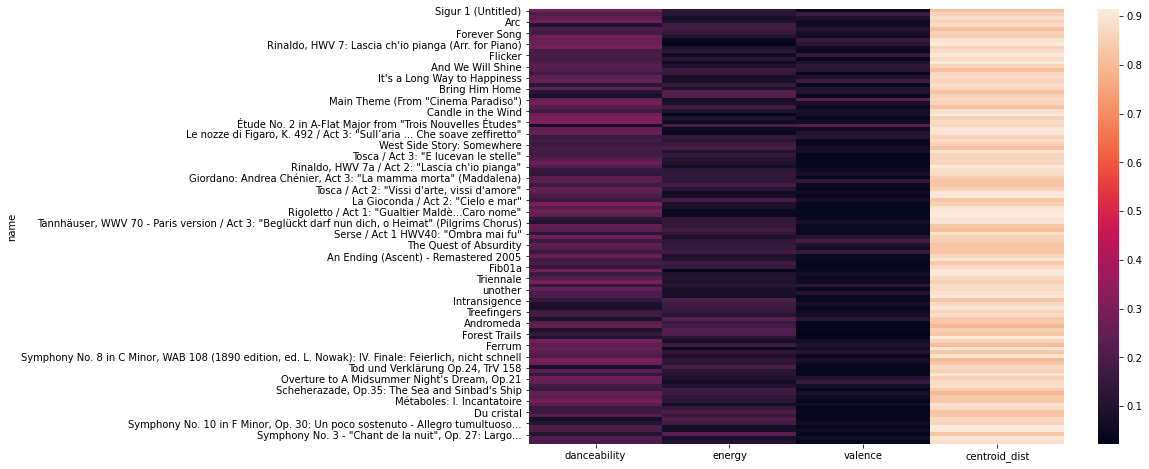

In [474]:
plt.subplots(figsize=(12, 8))
sns.heatmap(playlist_13)

cluster 14

In [407]:
cluster_14_playlist=scaled_audio_features2.query('cluster == 14').iloc[:,0:3]
centroid_14=centroids2.iloc[14,0:3].tolist()

In [408]:
cluster_14_playlist
dist = []
for index, row in cluster_14_playlist.iterrows(): 
    val = list(row)
    dist.append(euclidean_distance(centroid_14, val))

cluster_14_playlist= cluster_14_playlist.assign(centroid_dist = dist)

cluster_14_playlist.sort_values(by='centroid_dist')

,danceability,energy,valence,centroid_dist
name,,,,
Easy,0.595657,0.432,0.353299,0.201126
There Is More,0.597725,0.474,0.415228,0.206011
Up Where We Belong,0.592554,0.429,0.366497,0.209441
Goodbye Yellow Brick Road - Remastered 2014,0.578077,0.473,0.403046,0.214231
Sooner or Later,0.611169,0.440,0.431472,0.222713
...,...,...,...,...
"La campanella in G-Sharp Minor (From ""Grandes études de Paganini"", S. 141 / 3)",0.289555,0.287,0.516751,0.572093
Wichita Lineman - Remastered 2001,0.198552,0.392,0.396954,0.577725
Wonderful! Wonderful! (with Ray Conniff & His Orchestra & Chorus) - Single Version,0.258532,0.398,0.567513,0.578229


In [409]:
cluster_14_playlist['centroid_dist'].mean()

0.382894022065572

In [497]:
scaled_audio_features2['centroid_dist']=playlist_14['centroid_dist']
scaled_audio_features2=scaled_audio_features2.drop(['centroid_dist'], axis=1)

In [502]:
playlist_14=cluster_14_playlist.query('centroid_dist <=0.382894022065572')
playlist_14.pivot_table(playlist_14, index=playlist_14.columns, columns=playlist_14.columns)

ValueError: Grouper and axis must be same length

<AxesSubplot:>

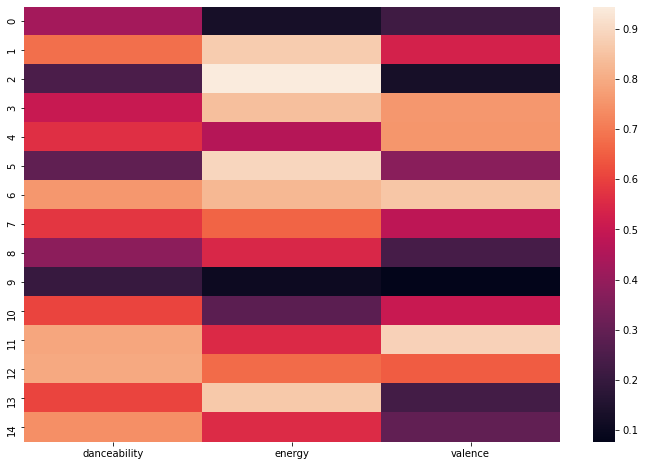

In [475]:
plt.subplots(figsize=(12, 8))
sns.heatmap(centroids2)

In [550]:
p_14=playlist_14.reset_index()
p_14['cluster']=14
p_14.set_index("name", inplace=True)
p_14

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
OBI,0.585315,0.314,0.342132,0.292279,14
Coração Vagabundo,0.596691,0.312,0.377665,0.296013,14
The Storms Are On The Ocean,0.549121,0.457,0.475127,0.283021,14
La Leyenda Del Pájaro Antiguo (feat. Nacho Vegas),0.434333,0.357,0.244670,0.370218,14
The Blizzard's Never Seen the Desert Sands,0.516029,0.373,0.395939,0.308507,14
...,...,...,...,...,...
For Your Glory - 1 Mic 1 Take,0.434333,0.381,0.395939,0.368909,14
Anyhow - Radio Edit,0.437435,0.432,0.396954,0.345281,14
There Is More,0.597725,0.474,0.415228,0.206011,14


In [553]:
playlists=p_0.append((p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14))

In [554]:
playlists

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
Gone,0.409514,0.895,0.184772,0.768038,0
"Love Is a Hurtin' Thing - 12"" Version",0.321613,0.867,0.093299,0.757847,0
Love Me Again,0.501551,0.915,0.204061,0.790226,0
Don't Look Back in Anger,0.360910,0.913,0.228426,0.787979,0
Mr. Brightside,0.362978,0.928,0.242640,0.802986,0
...,...,...,...,...,...
For Your Glory - 1 Mic 1 Take,0.434333,0.381,0.395939,0.368909,14
Anyhow - Radio Edit,0.437435,0.432,0.396954,0.345281,14
There Is More,0.597725,0.474,0.415228,0.206011,14


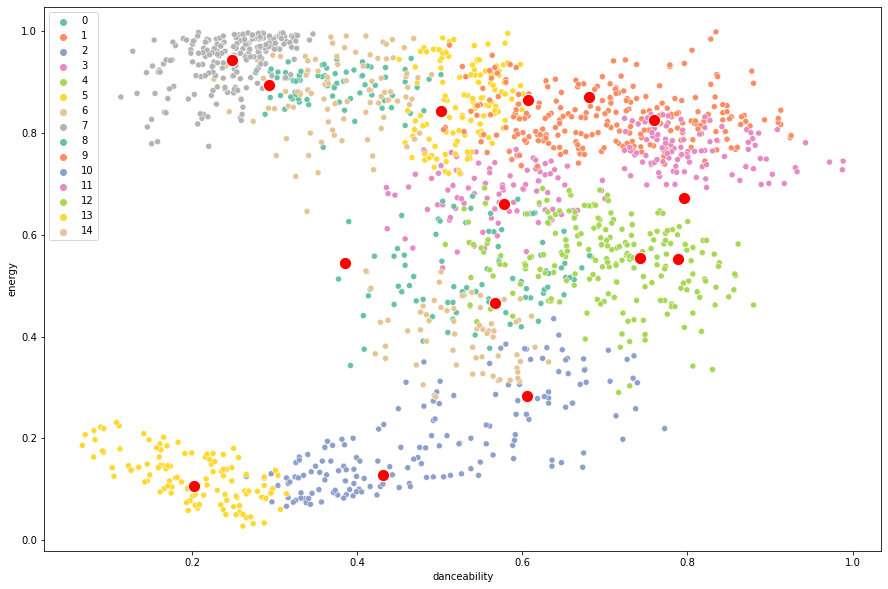

In [555]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=playlists, x='danceability', y='energy',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids2,  x='danceability', y='energy', color='red', s=150)
plt.show()

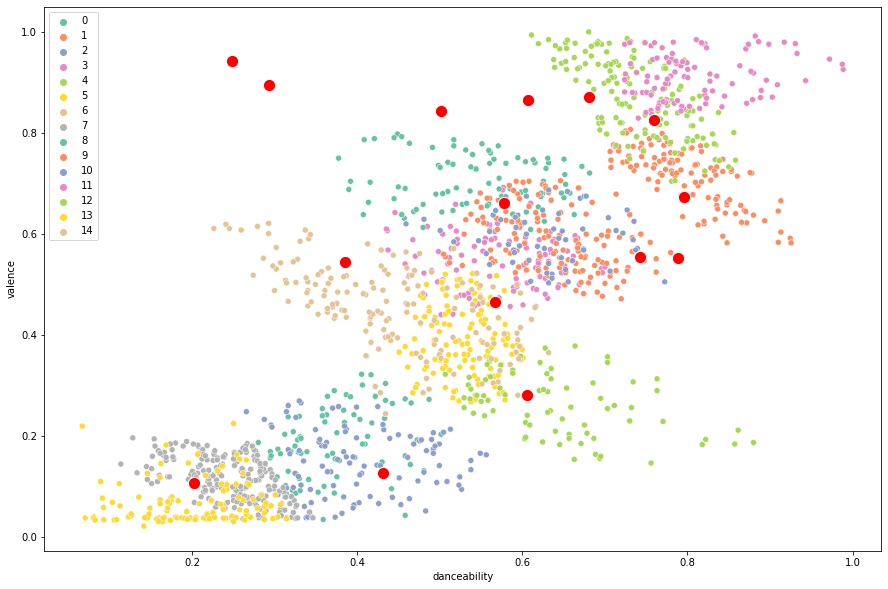

In [556]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=playlists, x='danceability', y='valence',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids2,  x='danceability', y='energy', color='red', s=150)
plt.show()

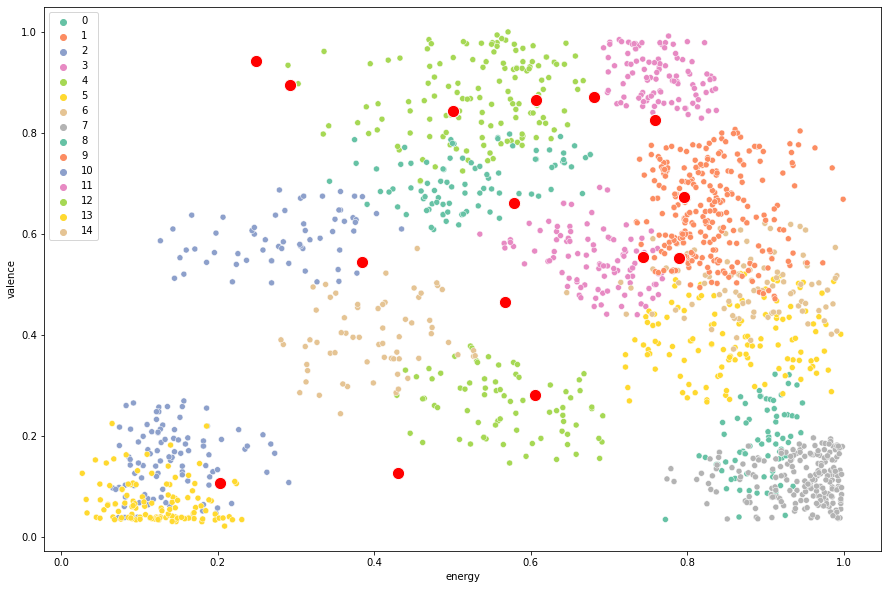

In [557]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=playlists, x='energy', y='valence',hue='cluster', palette='Set2')
sns.scatterplot(data=centroids2,  x='danceability', y='energy', color='red', s=150)
plt.show()

In [570]:
playlists.query('cluster==2').sample(5)

,danceability,energy,valence,centroid_dist,cluster
name,,,,,
August Sings,0.316443,0.111,0.173604,0.836133,2
Bluebird,0.463289,0.111,0.076650,0.861213,2
Heather,0.362978,0.128,0.187817,0.825226,2
Sunrise in Montmartre,0.425026,0.155,0.258883,0.817851,2
Moon River,0.329886,0.157,0.270051,0.802630,2
